In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from time import perf_counter 
import os
from tensorflow.keras.models import Sequential
from keras.utils.vis_utils import plot_model
from PIL import Image

In [2]:
def GetIndices(file_name):
    img = cv2.imread(file_name,0)
    bg=img[0,0]
    
    set1=np.array([],int)
    for i in range(200):
        if np.sum(np.array(img[:,i]!=bg))>50:
            set1=np.append(set1,i)       
    pos1=int(np.mean(set1))


    set2=np.array([],int)
    for i in range(pos1+50,350):
        if np.sum(np.array(img[:,i]!=bg))>50:
            set2=np.append(set2,i)       
    pos2=int(np.mean(set2))



    set3=np.array([],int)
    for i in range(pos2+50,500):
        if np.sum(np.array(img[:,i]!=bg))>50:
            set3=np.append(set3,i)
    pos3=int(np.mean(set3))
    

    ## Below are the row and colum slicing indices for the three segments img[row:row, column:column]
#     segment1=[5:175,pos1-70:pos1+70]
#     segment2=[5:175,pos2-70:pos2+70]
#     segment3=[5:175,pos3-70:pos3+70]
    
    segment1=[pos1-70,pos1+70]
    segment2=[pos2-70,pos2+70]
    segment3=[pos3-70,pos3+70]
    
    return [segment1,segment2,segment3]

In [3]:
def Processimage(file_name):
    img = cv2.imread(file_name,0)
    ker=np.ones((4,4))
    ret,thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)
    img2=cv2.erode(thresh,ker,iterations=1)
    
    #img2=255-img2 ##to return white image instead of black image
    
    return img2

In [ ]:
#frame = cv2.resize(frame,(200,200),fx=0,fy=0, interpolation = cv2.INTER_CUBIC)

# 1. Original
# 2. Gray
# 3. 

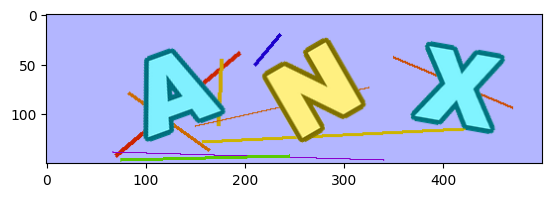

In [94]:
image = cv2.imread('8.png')
#a= Processimage()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
(T, threshInv) = cv2.threshold(gray.copy(), 127, 255,
    cv2.THRESH_BINARY_INV )

kernel_2 = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
cimg = cv2.erode(threshInv, kernel_2, iterations= 1)
#plt.imshow(cimg, cmap='gray')
plt.imshow(image)

True

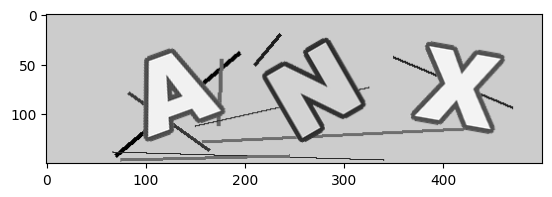

In [107]:
plt.imshow(gray, cmap='gray')
cv2.imwrite('gray.png', gray)

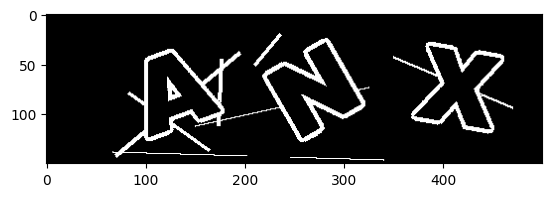

In [96]:
plt.imshow(threshInv, cmap='gray')

True

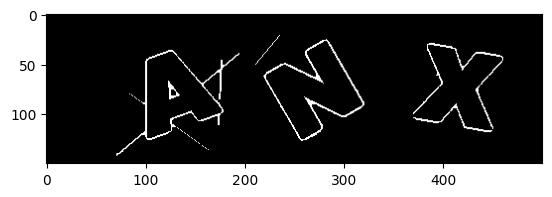

In [110]:
plt.imshow(cimg, cmap='gray')
cv2.imwrite('inverted.png', cimg)

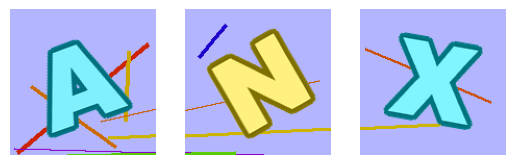

In [112]:
a=GetIndices('8.png')
image1=image[5:145,a[0][0]:a[0][1]]
image2=image[5:145,a[1][0]:a[1][1]]
image3=image[5:145,a[2][0]:a[2][1]]
images =[image1,image2, image3]
for i in range(3):
        ax = plt.subplot(1, 3, i+1)
        plt.imshow(images[i].astype("uint8"), cmap='gray')
        #plt.title(class_names[labels[i]])
        plt.axis("off")

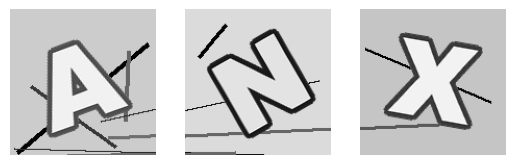

In [113]:
a=GetIndices('8.png')
image1=gray[5:145,a[0][0]:a[0][1]]
image2=gray[5:145,a[1][0]:a[1][1]]
image3=gray[5:145,a[2][0]:a[2][1]]
images =[image1,image2, image3]
for i in range(3):
        ax = plt.subplot(1, 3, i+1)
        plt.imshow(images[i].astype("uint8"), cmap='gray')
        #plt.title(class_names[labels[i]])
        plt.axis("off")

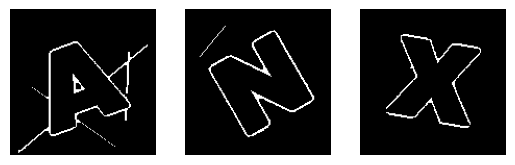

In [114]:
a=GetIndices('8.png')
image1=cimg[5:145,a[0][0]:a[0][1]]
image2=cimg[5:145,a[1][0]:a[1][1]]
image3=cimg[5:145,a[2][0]:a[2][1]]
images =[image1,image2, image3]
for i in range(3):
        ax = plt.subplot(1, 3, i+1)
        plt.imshow(images[i].astype("uint8"), cmap='gray')
        #plt.title(class_names[labels[i]])
        plt.axis("off")

In [98]:
def GetSegmentedImages(file_name):
    a=GetIndices(file_name)
    img2=Processimage(file_name)
    image1=img2[5:145,a[0][0]:a[0][1]]
    image2=img2[5:145,a[1][0]:a[1][1]]
    image3=img2[5:145,a[2][0]:a[2][1]]
    images =[image1,image2, image3]
    
    return images

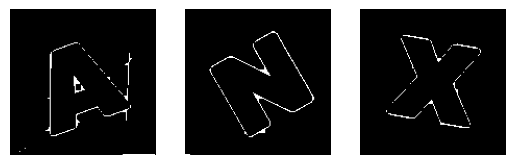

In [5]:
images=GetSegmentedImages("train/8.png")
for i in range(3):
        ax = plt.subplot(1, 3, i+1)
        plt.imshow(images[i].astype("uint8"), cmap='gray')
        #plt.title(class_names[labels[i]])
        plt.axis("off")

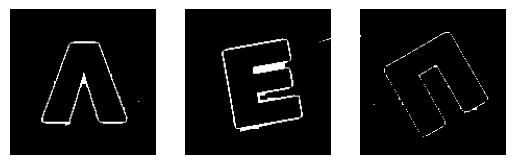

In [6]:
images=GetSegmentedImages("train/16.png")
for i in range(3):
        ax = plt.subplot(1, 3, i+1)
        plt.imshow(images[i].astype("uint8"), cmap='gray')
        #plt.title(class_names[labels[i]])
        plt.axis("off")

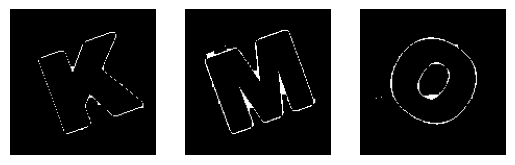

In [7]:
images=GetSegmentedImages("train/11.png")
# plt.imshow(images[2].astype("uint8"), cmap='gray')
for i in range(3):
        ax = plt.subplot(1, 3, i+1)
        plt.imshow(images[i].astype("uint8"), cmap='gray')
        #plt.title(class_names[labels[i]])
        plt.axis("off")

In [8]:
with open('train/labels.txt') as f:
	lines = [line for line in f]

#print(lines)

# removing the new line characters
with open('train/labels.txt') as f:
	lines = [line.rstrip() for line in f]
    
print(lines[0])
labels = lines[0].split(',')
print(labels[0])

ZETA,EPSILON,LAMDA
ZETA


c:\users\rahul\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.


error: OpenCV(4.5.4) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:799: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'


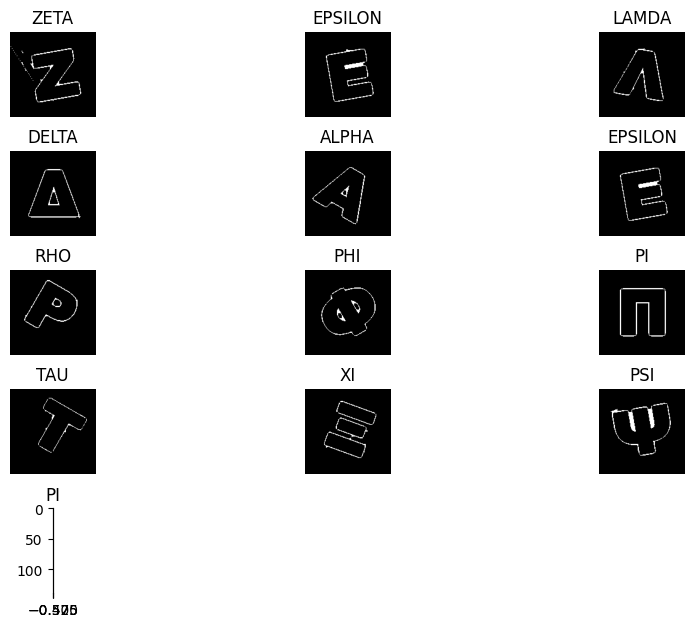

In [120]:
new_images = []
file1 = open("lab.txt","w+")
labs =[]
c=0
num = 7
for j in range(num):
    new_images.append( GetSegmentedImages('train/{}.png'.format(j)) )
    labs.append( lines[j].split(',') )
# print(tuple(new_images))
    
# plt.imshow(new_images[0][0].astype("uint8"), cmap='gray')  
plt.figure(figsize=(10, 10))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
for j in range(num):
    for i in range(3):
        ax = plt.subplot(num, 3, c+1)
        plt.imshow(new_images[j][i].astype("uint8"), cmap='gray')
        plt.title(labs[j][i])
        file1.write(labs[j][i]+"\n")
        #if labs[j][i]=='ZETA':
        cv2.imwrite(os.path.join('dataset' , '{}.jpg'.format(c)), new_images[j][i])    
        plt.axis("off")
        c=c+1

In [ ]:
# plt.figure(figsize=(8, 8))
# for images, labels in train_ds.take(1):
    
#     print(images[i])
#     for i in range(6):
#         ax = plt.subplot(3, 3, i+1)
#         plt.imshow(images[i].numpy().astype("uint8"), cmap = 'gray')
#         #plt.title(class_names[labels[i]])
#         plt.axis("off")